# Catullus dendrogram

Code and data for preprint Showcase A / Figure 2

In [ ]:
%load_ext rpy2.ipython

In [3]:
import pandas as pd
from collections import Counter
import metronome as met

In [4]:
from importlib.metadata import version

version("metronome")

'0.1.1'

## Import Data

In [5]:
df = pd.read_csv("../data/classical_latin.csv", keep_default_na=False)
df

,canonical_title,author,work,metre,book,number,title,lines,metronome
0,Satires 12,Juvenal,Satires,hexameter,,12,,130,SSS.SSw.wS.ww.Sww.S.S.|S.SS.SSw.wS.wwSww.SS.|S...
1,Eclogues 3,Vergil,Eclogues,hexameter,3,,,111,S.ww.SSS.SS.ww.S.wwSS.|S.S.SSS.SS.ww.Sww.SS.|S...
2,Argonautica 5,Valerius Flaccus,Argonautica,hexameter,5,,,695,Sww.S.S.Sw.wS.SSw.wSS.|SwwS.SS.SSw.wSww.SS.|Sw...
3,Satires 8,Juvenal,Satires,hexameter,,8,,275,Sww.S.wwS.S.SS.Sww.SS.|Sww.SSS.SS.SSww.SS.|SS....
4,Fasti 3,Ovid,Fasti,elegy,3,,,884,Sww.SwwS.wwS.SSw.w.SS.|S.ww.S.wwS.Sww.Sw.wS.|S...
...,...,...,...,...,...,...,...,...,...
2583,Silvae 5.4,Statius,Silvae,hexameter,5,4,Somnvs,19,Sww.S.wwS.wwS.wwSww.SS.|S.SSw.wS.SS.S.Sw.wSS.|...
2584,Silvae 5.5,Statius,Silvae,hexameter,5,5,Epicedion In Pvervm Svvm,87,S.wwS.w.wS.SS.SSww.SS.|SwwS.S.SwwS.SSww.SS.|SS...
2585,Punica 16,Silius Italicus,Punica,hexameter,16,,,700,Sww.SSS.SS.wwSw.wSS.|Sww.SSS.SS.S.Sww.SS.|S.SS...
2586,De Rerum Natura 3,Lucretius,De Rerum Natura,hexameter,3,,,1095,S.wwS.SS.S.S.SSww.SS.|S.SS.wwS.SSS.Sww.SS.|S.w...


In [6]:
meter_counts = df.groupby("metre")["author"].transform("count")

<Axes: xlabel='metre'>

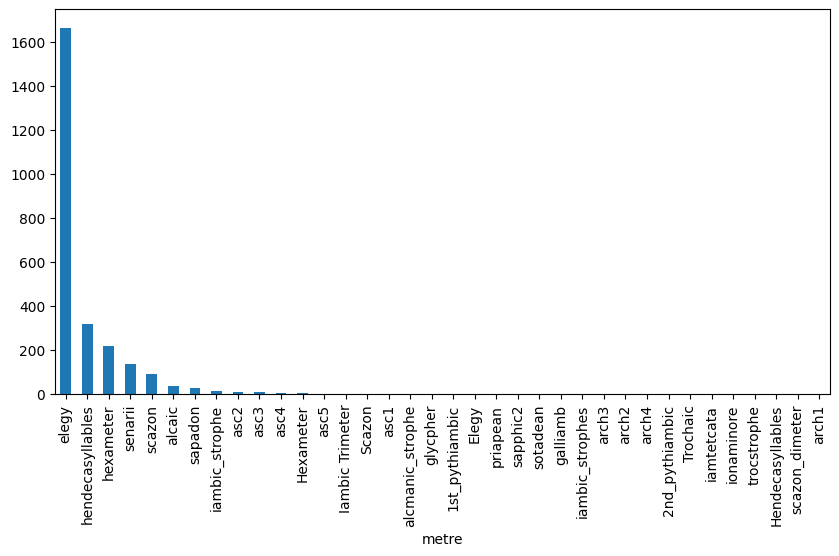

In [7]:
# For interest, overall metre counts for the classical corpus

df["metre"].value_counts().plot.bar(figsize=(10, 5))

In [8]:
# Catullus sample.

# There's a lot of Catullus which is a distraction for these purposes, so drop
# the elegies and half of the hendecasyllables (just make sure 55 is part of our
# random sample)
cat_df = df[(df.author == "Catullus") & (df.metre != "elegy")].reset_index(drop=True)
cat_df = cat_df.drop(
    cat_df[cat_df.metre == "hendecasyllables"].sample(frac=0.5, random_state=42).index
).reset_index(drop=True)
cat_df["node"] = cat_df.index + 1
cat_df.drop("title", axis=1)
cat_df["title"] = cat_df["number"] + " " + cat_df["metre"]
cat_df

,canonical_title,author,work,metre,book,number,title,lines,metronome,node
0,Poems 1,Catullus,Poems,hendecasyllables,,1,1 hendecasyllables,10,S.SS.wwS.wS.wSS.|SwS.ww.Sw.SwSS.|SSS.ww.Sw.S.w...,1
1,Poems 2,Catullus,Poems,hendecasyllables,,2,2 hendecasyllables,10,SS.SwwS.wS.wSS.|SS.Sww..S.wS.wSS.|S.SS.wwS.w.S...,2
2,Poems 2b,Catullus,Poems,hendecasyllables,,2b,2b hendecasyllables,3,S.S.S.ww.S.wS.wSS.|SS.SwwS.wSw.SS.|S.SS.wwS.wS...,3
3,Poems 4,Catullus,Poems,Iambic Trimeter,,4,4 Iambic Trimeter,27,wSw.Sw.S.wSw.SwS.|wS.wSw.SwS.wSwS.|w.SwS.wSw.S...,4
4,Poems 6,Catullus,Poems,hendecasyllables,,6,6 hendecasyllables,17,SS.SwwS.wS.wSS.|S.S.Sww.S.wSwSS.|SS.Sww.S.wSw....,5
5,Poems 8,Catullus,Poems,scazon,,8,8 scazon,19,wS.wSw.SwS.wSSS.|S.S.wS.wSw.SwS.SS.|SSw.SS.SwS...,6
6,Poems 9,Catullus,Poems,hendecasyllables,,9,9 hendecasyllables,11,SS.Sww.S.wS.wSS.|SSS.ww.SwS.wSS.|SSSw.w.S.wS.w...,7
7,Poems 11,Catullus,Poems,sapadon,,11,11 sapadon,24,S.w.SSS.wwS.wSS.|S.w.SSS.wwSw.SS.|Sw.S.SS.wwS....,8
8,Poems 13,Catullus,Poems,hendecasyllables,,13,13 hendecasyllables,14,SSS.ww.S.wS.wS.S.|SS.S.ww.S.wS.wSS.|S.S.SwwS.w...,9
9,Poems 14,Catullus,Poems,hendecasyllables,,14,14 hendecasyllables,23,S.S.S.wwS.wS.wSS.|SSSww.Sw.Sw.SS.|SSS..wwS.wSw...,10


## Run Metronome and Visualize

In [9]:
scorer = met.scoring.Scorer()
cat_dm = scorer.dist_matrix_parallel(cat_df)

2024-04-26 11:37:21,474	INFO worker.py:1749 -- Started a local Ray instance.


In addition: Warning message:
In geom_point2(mapping, data, position, na.rm, show.legend, inherit.aes,  :
  Ignoring unknown parameters: `align`


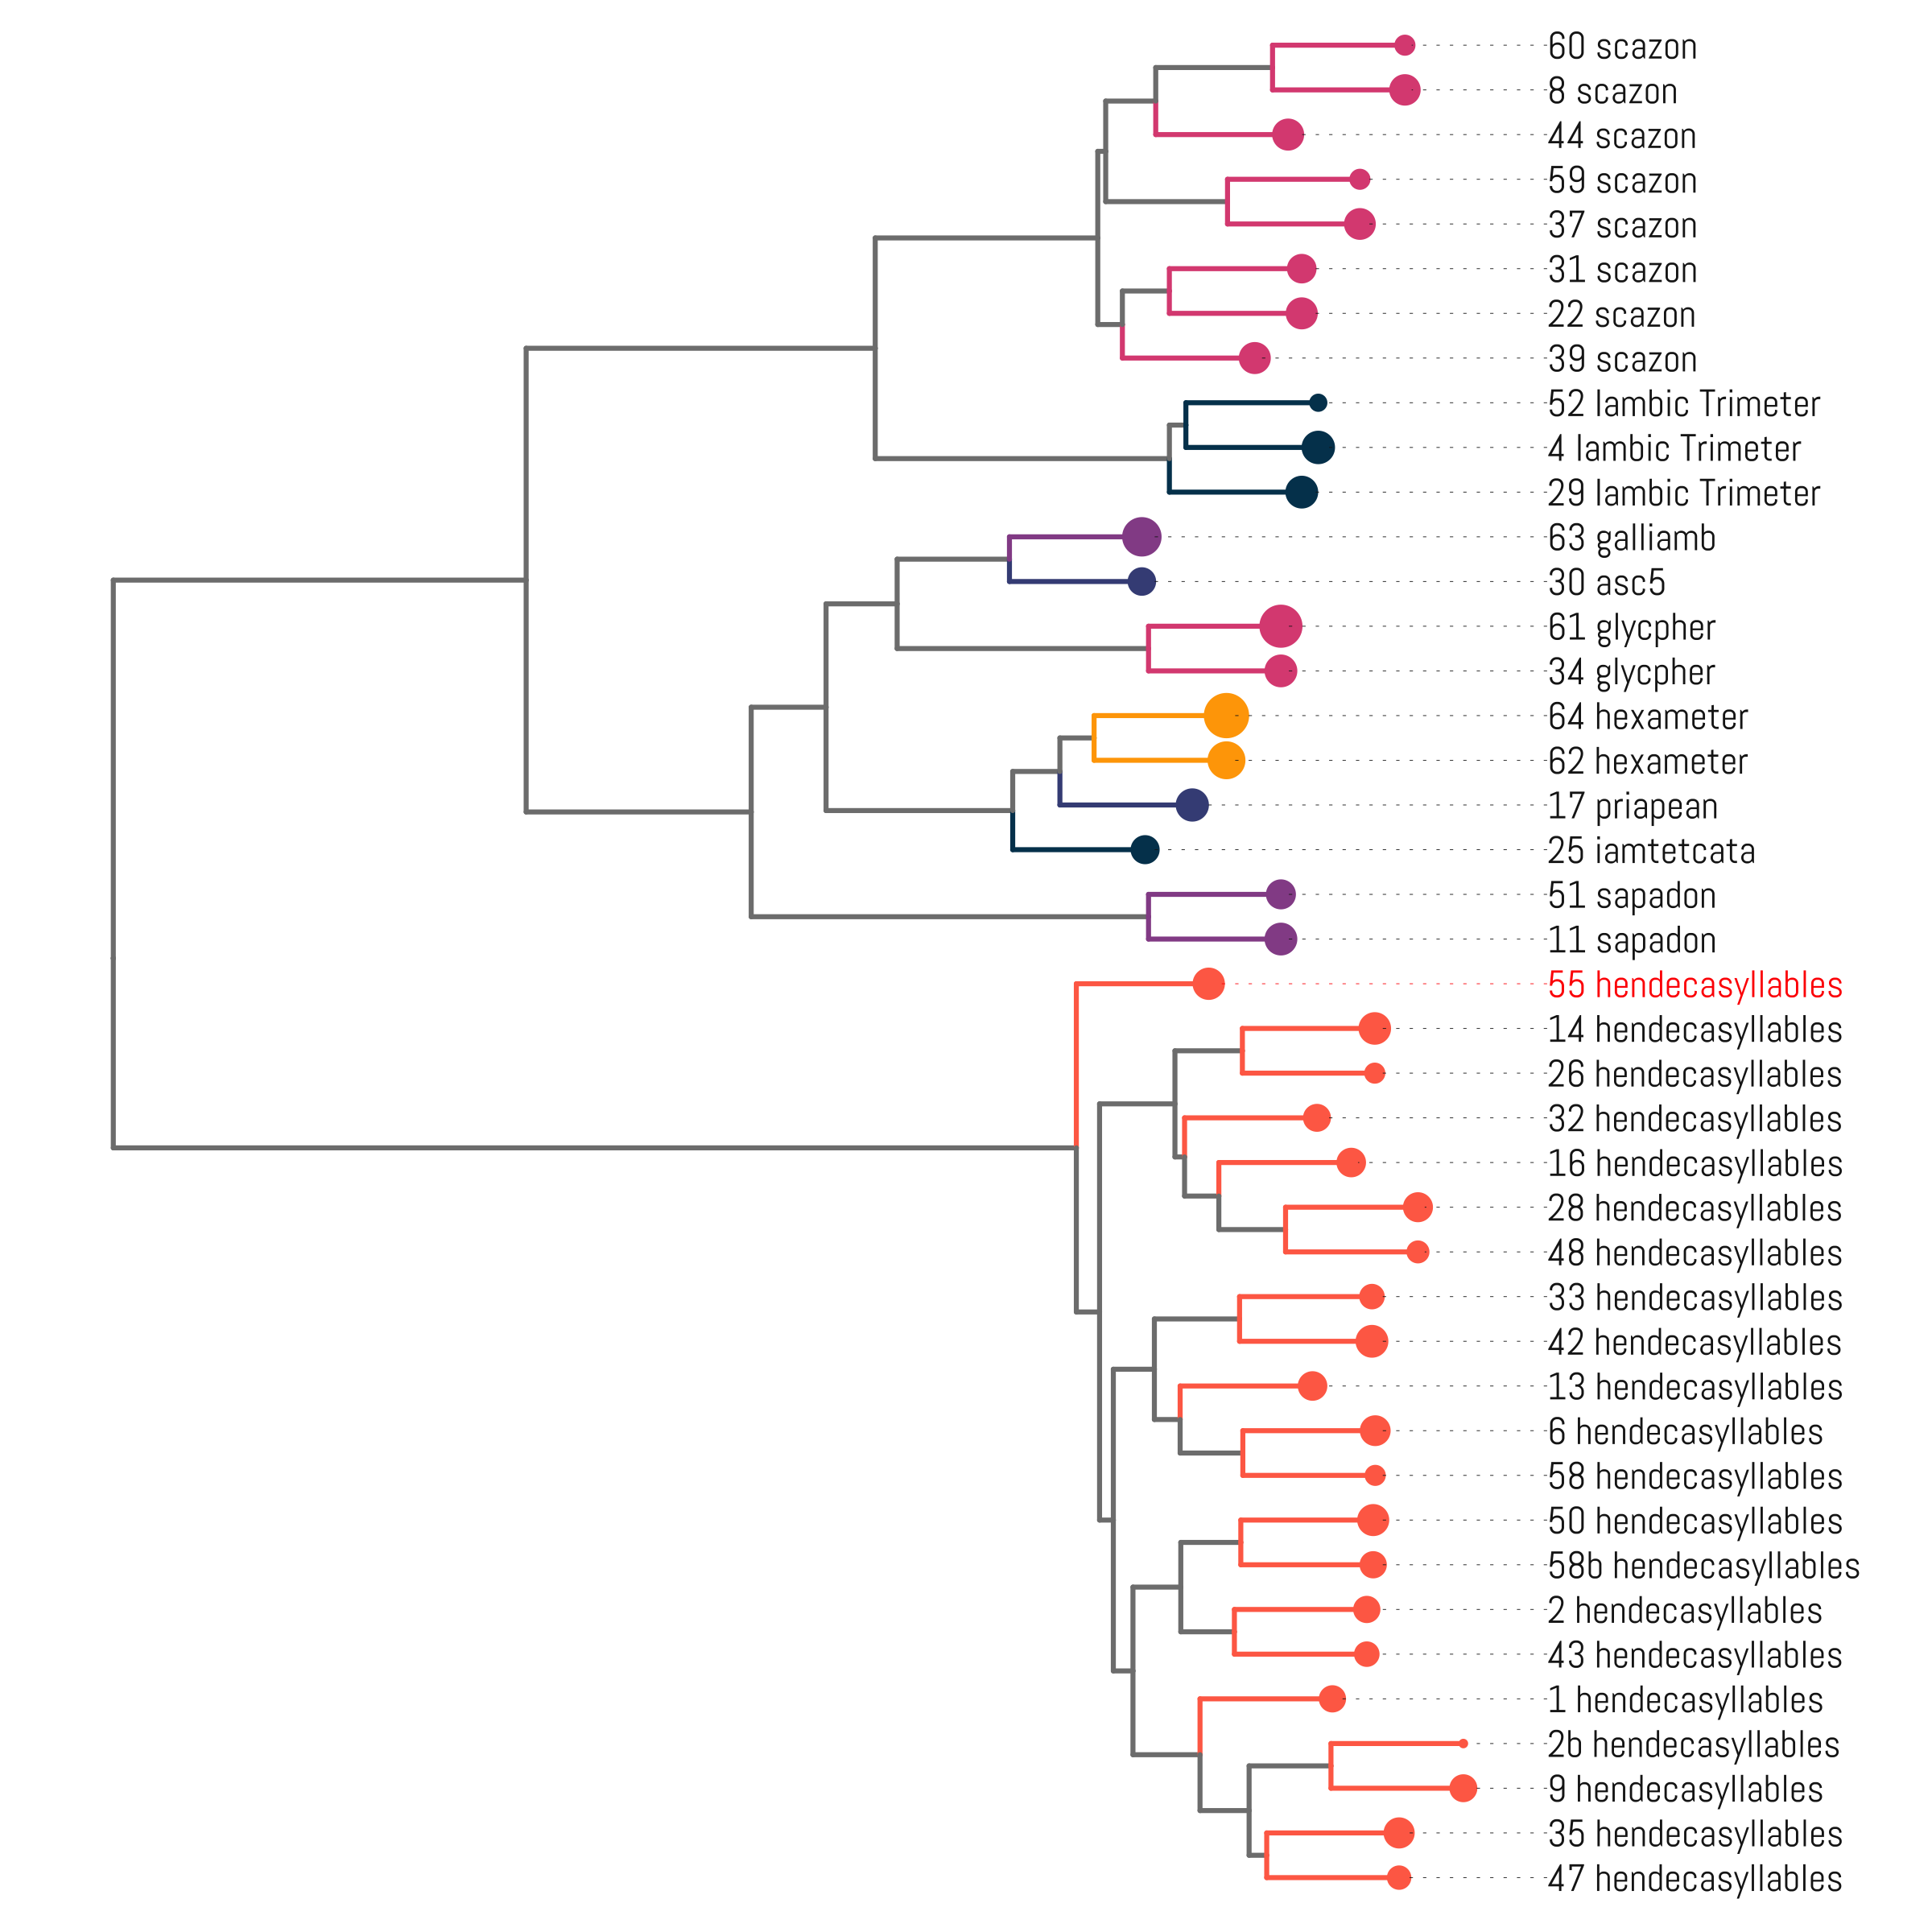

In [11]:
%%R -i cat_dm,cat_df -h 8 -w 8 -u in -r 300

library(ggplot2)
library(dplyr)
library(ggtree)
library(showtext)
library(paletteer)
library(ape)
library(ggnewscale)

showtext_auto()
font_add_google("Abel", "fnt")
plt <- paletteer::paletteer_d("ggsci::category20_d3")
plt <- c(
    "#003f5c",
    "#444e86",
    "#955196",
    "#dd5182",
    "#ff6e54",
    "#ffa600",
    "#003f5c", # reuse the same colours to make 10
    "#444e86",
    "#955196",
    "#dd5182"
)
# rename to easy copy/paste
m <- cat_dm
df <- cat_df
dm <- as.dist(m)

# do the clustering
hc <- hclust(dm,method='ward.D2')
p <- ggtree(hc,layout="rect",aes(color=metre),size=0.7,ladderize=T) %<+% df +
geom_tippoint(aes(size=log(lines),color=metre),shape=16,show.legend=F,align=T) +
hexpand(0.2) +
scale_color_manual(values=plt) +
# New scale for the black / red tip labels
new_scale_colour() +
geom_tiplab(aes(label=title, color=number==55),family='fnt',align=T,size=4, linetype='dotted',linesize=0.1,offset=0.1) +
scale_color_manual(values=c("grey10", "red")) +
theme_tree(legend.position = "none")
# rotate the hendeca cluster so that 55 is in the middle of the plot, for aesthetics
p <- ggtree::rotate(p,44)

# fn <- "figures/catullus_dendro.pdf"
# ggsave(fn, plot = p, dpi=600, width=8, height=8, device=cairo_pdf)

p


In [12]:
%%R

sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.4.1

Matrix products: default
BLAS:   /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C/UTF-8/C/C/C/C

time zone: Europe/Warsaw
tzcode source: internal

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggnewscale_0.4.10 ape_5.7-1         paletteer_1.6.0   showtext_0.9-7   
[5] showtextdb_3.0    sysfonts_0.8.9    ggtree_3.11.1     dplyr_1.1.4      
[9] ggplot2_3.5.0    

loaded via a namespace (and not attached):
 [1] yulab.utils_0.1.4  utf8_1.2.4         generics_0.1.3     tidyr_1.3.1       
 [5] prismatic_1.1.1    ggplotify_0.1.2    lattice_0.22-5     digest_0.6.34     
 [9] magrittr_2.0.3     grid_4.3.3 